Скачиваем CSV

In [1]:
import gdown

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_id = '1r6BtSclIc0UeYTCU1XUo7ke-3wV81DhvZVT4MA1zrOM'
url = f'https://docs.google.com/spreadsheets/d/{file_id}/export?format=csv'

output = 'data.csv'

DATA_LINK = "https://drive.google.com/drive/folders/14qLfl0McU7WnyDVBjQ3uI3PYoDN-E_GJ?usp=sharing"

gdown.download(url, output, quiet=False)

/usr/lib/python3/dist-packages/pytz/__init__.py:31: SyntaxWarning: invalid escape sequence '\s'
  match = re.match("^#\s*version\s*([0-9a-z]*)\s*$", line)
/home/dan11l/.local/lib/python3.13/site-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://docs.google.com/spreadsheets/d/1r6BtSclIc0UeYTCU1XUo7ke-3wV81DhvZVT4MA1zrOM/export?format=csv
To: /mnt/e/Programming/ML/PADII-ML-PRJ-25-Property-Price-Prediction/data.csv
14.3MB [00:00, 16.1MB/s]


'data.csv'

In [2]:
data = pd.read_csv('data.csv')
data.isna().mean()

id                      0.000000
price                   0.000000
area                    0.000000
rooms                   0.000000
ceilingHeight           0.311558
kitchen_space           0.000000
floor                   0.000000
floorsTotal             0.000067
creationDate            0.000000
seller                  0.000000
address                 0.000000
nearest_metro           0.028850
time_to_metro           0.028850
transport_to_metro      0.028850
branch_metro_color      0.028850
parks_count             0.000000
nearest_park            0.628343
time_park               0.628343
distance_park           0.628343
ponds_count             0.000000
nearest_pond            0.385723
time_pond               0.385723
distance_pond           0.385723
nearest_airport         0.003903
time_airport_via_car    0.003903
distance_airport        0.003903
dtype: float64

In [3]:
data.nearest_airport.unique()

array(['Пулково', nan], dtype=object)

Бесполезный столбец - удаляем

In [4]:
data = data.drop('nearest_airport', axis=1)

Удаляем столбец id - бесполезный

In [5]:
data = data.drop('id', axis=1)

В столбцах про парк > 60% пропусков - просто удалим

In [6]:
data = data.drop(['distance_park', 'time_park', 'nearest_park'], axis=1)

In [7]:
data.rooms.unique()

array(['studio', '1', '2', '3', '6', '4', '5', 'plus_7'], dtype=object)

Заменим studio на 0, plus_7 - на 7

In [8]:
def converse(x):
    if (x == 'studio'):
        return '0'
    if (x == 'plus_7'):
        return '7'
    return x

In [9]:
data['rooms'] = data.rooms.apply(converse)

In [10]:
data.rooms.unique()

array(['0', '1', '2', '3', '6', '4', '5', '7'], dtype=object)

Поставим настройку, чтобы все столбцы выводились

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
data.sample(10)

price   area rooms  ceilingHeight kitchen_space  floor  floorsTotal  \
3438    3963411  33.62     0            NaN        studio      9         16.0   
22114  10657532  36.10     1            NaN          17.8     17         23.0   
25768   9643200  49.20     2            NaN          11.8      3          3.0   
41200  19048636  77.21     3           2.73         16.56      2         12.0   
29691  24470160  59.80     2           3.00           4.9      4          9.0   
34265  15399000  56.80     2           2.70          11.5     17         20.0   
14049  20990000  44.60     1           3.90          16.7      5          6.0   
42949  10000000  75.20     4           2.60           8.6     12         14.0   
29580  25760000  77.32     2           3.10          21.5      6         16.0   
23854  21908308  25.73     1            NaN             5      2          9.0   

               creationDate     seller  \
3438   2024-12-04T07:02:42Z  DEVELOPER   
22114  2024-11-28T08:19:32Z  DEVELOPER   
25768  2024-05-31T12:21:17Z  DEVELOPER   
41200  2024-09-24T07:38:53Z  DEVELOPER   
29691  2023-03-10T11:46:12Z  DEVELOPER   
34265  2024-10-03T11:40:29Z     AGENCY   
14049  2024-11-09T07:02:35Z     AGENCY   
42949  2025-02-26T12:33:09Z     AGENCY   
29580  2025-03-01T00:38:04Z  DEVELOPER   
23854  2024-04-24T09:53:10Z  DEVELOPER   

                                                 address  \
3438   Россия, Ленинградская область, Всеволожский ра...   
22114    Россия, Санкт-Петербург, улица Шостаковича, 1/9   
25768             Россия, Ленинградская область, 41К-623   
41200  Россия, Санкт-Петербург, Среднерогатская улица...   
29691  Россия, Санкт-Петербург, жилой комплекс Лермон...   
34265     Россия, Санкт-Петербург, улица Бабушкина, 82к3   
14049  Россия, Санкт-Петербург, Малый проспект Петрог...   
42949     Россия, Санкт-Петербург, Хасанская улица, 18к2   
29580  Россия, Санкт-Петербург, Василеостровский райо...   
23854      Россия, Санкт-Петербург, Пионерская улица, 53   

              nearest_metro  time_to_metro transport_to_metro  \
3438           Пролетарская           35.0       ON_TRANSPORT   
22114  Проспект Просвещения           11.0            ON_FOOT   
25768                   NaN            NaN                NaN   
41200              Звёздная           12.0       ON_TRANSPORT   
29691            Балтийская            6.0            ON_FOOT   
34265          Пролетарская            7.0            ON_FOOT   
14049         Петроградская            7.0            ON_FOOT   
42949  Проспект Большевиков           11.0       ON_TRANSPORT   
29580            Приморская           25.0       ON_TRANSPORT   
23854            Чкаловская            7.0            ON_FOOT   

      branch_metro_color  parks_count  ponds_count    nearest_pond  time_pond  \
3438              23a12c            0            0             NaN        NaN   
22114             16bdf0            0            0             NaN        NaN   
25768                NaN            0            0             NaN        NaN   
41200             16bdf0            0            0             NaN        NaN   
29691             f03d2f            3            1  Обводный канал      131.0   
34265             23a12c            2            0             NaN        NaN   
14049             16bdf0           10            1   река Карповка      353.0   
42949             f07c1d            0            0             NaN        NaN   
29580             23a12c            0            3    Невская губа      240.0   
23854             c063d1            4            0             NaN        NaN   

       distance_pond  time_airport_via_car  distance_airport  
3438             NaN                2229.0           29434.0  
22114            NaN                3033.0           50971.0  
25768            NaN                2514.0           36172.0  
41200            NaN                1530.0            9784.0  
29691          180.0                1619.0           18387.0  
34265   

In [13]:
data[data.address == 'Россия, Санкт-Петербург'].shape[0] / data.shape[0]

0.01354989231873654

Меньше одного процента - лучше удалить. Непонятно, как хорошо заполнить

Можно было бы брать медиану по метро для таких объявлений, но ради одного процента слишком много мороки

In [14]:
data.shape

(44576, 21)

In [15]:
data = data[data.address != 'Россия, Санкт-Петербург']
data.shape

(43972, 21)

Зачем я трогаю адрес - я хочу разбить его на столбцы

Избавимся от общей, незначимой информации

In [16]:
string = 'Россия, Привет'
string.split('Россия,')[1].strip()
data.address = data.address.apply(lambda x: x.split('Россия,')[1].strip())

In [17]:
data.address.sample(10)

20675                  Санкт-Петербург, проспект Будённого
16654     Санкт-Петербург, 3-й Рабфаковский переулок, 5к5Л
41162    Санкт-Петербург, Петродворцовый район, посёлок...
10273              Санкт-Петербург, Муринская дорога, 55к1
40002           Санкт-Петербург, Петровский проспект, 24к3
2060                     Санкт-Петербург, улица Салова, 61
26377                       Ленинградская область, 41К-623
25296           Санкт-Петербург, проспект Большевиков, уч3
26446                       Ленинградская область, 41К-623
9569        Санкт-Петербург, Октябрьская набережная, 122к4
Name: address, dtype: object

Собираем новый массив данных - поочереди добавляем с адресами

In [18]:
new_data = pd.DataFrame()

Рассмотрим адреса длины 3 - Санкт-Петербург, улица, дом

In [19]:
street_types = [
    'улица', 'проспект', 'линия', 'бульвар', 'переулок', 'шоссе', 
    'набережная', 'площадь', 'проезд', 'тупик', 'аллея', 'тракт', 
    'дорога', 'квартал', 'микрорайон', 'переезд', 'спуск', 'территория', 'проток', 'ЖК', 'комплекс', 'остров'
]

In [20]:
def select_addr(x):
    if (len(str(x).lower().split(',')) < 2):
        return False
    string_street = str(x).lower().split(',')[1].strip()
    for x in street_types:
        if x in string_street:
            return True
    return False

In [21]:
address_mask = data.address.apply(select_addr)

new_data = data[address_mask].copy()
new_data.shape

(29924, 21)

In [22]:
def get_number(x):
    list_of_data = str(x).lower().split(',')
    len_string = len(list_of_data)
    for i in range(2, len_string):
        if any(char.isdigit() for char in list_of_data[i]):
            return list_of_data[i].strip()
    return np.nan

In [23]:
new_data['city'] = new_data['address'].apply(lambda x: x.split(',')[0].strip())
new_data['street'] = new_data['address'].apply(lambda x: x.split(',')[1].strip())
new_data['home'] = new_data['address'].apply(get_number)

In [24]:
new_data[['city', 'street', 'home']].sample(10)

city                    street  home
1805   Санкт-Петербург    Октябрьская набережная  34к2
640    Санкт-Петербург  улица Генерала Кравченко   7к3
22126  Санкт-Петербург    Октябрьская набережная   NaN
43851  Санкт-Петербург          Пионерская улица    13
21571  Санкт-Петербург        Партизанская улица    3в
30886  Санкт-Петербург         улица Карпинского  36к3
34563  Санкт-Петербург      улица Лидии Зверевой   9к1
23943  Санкт-Петербург          Пионерская улица    53
1737   Санкт-Петербург    Октябрьская набережная  34к4
12857  Санкт-Петербург  бульвар Александра Грина   2к1

Хочу получить данные без букв в home

In [25]:
import re

In [26]:
new_data['home'] = new_data['home'].apply(lambda x: re.search(r'\d+', str(x)).group() if re.search(r'\d+', str(x)) else np.nan)

In [27]:
new_data[['city', 'street', 'home']].sample(10)

city                     street home
30889  Санкт-Петербург  Новоизмайловский проспект   38
42364  Санкт-Петербург           Кожевенная линия   39
32160  Санкт-Петербург          улица Подвойского   24
15612  Санкт-Петербург  3-й Рабфаковский переулок    5
2132   Санкт-Петербург            Плесецкая улица   21
13013  Санкт-Петербург           Выборгское шоссе  156
12728  Санкт-Петербург           Варшавская улица   32
39947  Санкт-Петербург      набережная реки Мойки  100
1211   Санкт-Петербург         проспект Ветеранов  200
715    Санкт-Петербург         проспект Будённого   23

Запоминаем, что мы уже добавили в таблицу

In [28]:
remember_list = ~address_mask

In [29]:
data = data[remember_list]
data.shape[0], new_data.shape[0]

(14048, 29924)

In [30]:
pd.set_option('display.max_colwidth', None)

In [31]:
data.address.sample(10)

26904                             Санкт-Петербург, Приморский район, муниципальный округ Коломяги, жилой комплекс ЦДС Дримлайн
6652                                                                                            Ленинградская область, 41К-623
25892                                                                               Санкт-Петербург, Колпино, Загородная улица
3842                                              Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Ленсоветовский
19773                                         Санкт-Петербург, Петродворцовый район, посёлок Стрельна, жилой комплекс Любоград
15523    Ленинградская область, Ломоносовский район, Аннинское городское поселение, городской посёлок Новоселье, Невская улица
30614                                                                           Санкт-Петербург, Ломоносов, улица Победы, 36к1
9081                                                Санкт-Петербург, Пушкинский район, посёлок Шушары, Московск

In [32]:
village_types = ['посёлок', 'посёлок', 'Колпино', 'Пушкин', 'Шушары', 'Мурино', 
                 'Парголово', 'Кронштадт', 'Рыбацкое', 'Сестрорецк', 'Лаголово', 
                 'Деревня', 'Округ', 'Тосно', 'Бугры', 'Петергоф', 'Ломоносов', 'Кудрово',
                 'поселение', 'село', 'Зеленогорск', 'город']

In [33]:
def select_address(x):
    flag_village = False
    flag_street = False
    flag_home = False
    village = ' '
    street = ' '
    number = ' '
    list_of_substrings = str(x).lower().split(',')
    for i in range(len(list_of_substrings)):
        if (not flag_home) & flag_village & flag_street:
            if any(char.isdigit() for char in list_of_substrings[i]):
                number = list_of_substrings[i]
                flag_home = True
        if (not flag_street) & flag_village:
            for x in street_types:
                if x.lower() in list_of_substrings[i]:
                    flag_street = True
                    street = list_of_substrings[i]
        if (not flag_village):
            for x in village_types:
                if x.lower() in list_of_substrings[i]:
                    flag_village = True
                    village = list_of_substrings[i]
        
        
    if (flag_village == False & flag_street == False & flag_home == False):
        return np.nan
    return ', '.join(filter(None, [village, street, number]))

In [34]:
new_porsion = data[data.address.apply(select_address).notna()]

In [35]:
new_porsion['address'] = new_porsion.address.apply(select_address)
new_porsion.head(5)

/tmp/ipykernel_1035/3452202826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_porsion['address'] = new_porsion.address.apply(select_address)


price  area rooms  ceilingHeight kitchen_space  floor  floorsTotal  \
35  2500000  20.0     0           2.70        studio      1         11.0   
43  2750000  22.4     0           2.75        studio      4         12.0   
45  2950000  21.8     0           2.50        studio      5         11.0   
47  2900000  20.0     0            NaN        studio      6          9.0   
50  2980000  25.0     0            NaN        studio      2         11.0   

            creationDate  seller  \
35  2024-09-20T10:20:00Z  AGENCY   
43  2024-09-16T21:58:41Z  AGENCY   
45  2024-04-09T22:57:54Z  AGENCY   
47  2025-02-14T07:18:49Z  AGENCY   
50  2023-12-22T12:10:58Z   AGENT   

                                                                    address  \
35               городской посёлок имени свердлова,  западный проезд,  13/1   
43                                 ломоносовский район,  уланская улица,  3   
45                                      ломоносов,  михайловская улица,  51   
47                                      ломоносов,  михайловская улица,  51   
50   городской посёлок имени свердлова,  жилой комплекс невские панорамы,     

   nearest_metro  time_to_metro transport_to_metro branch_metro_color  \
35  Пролетарская           41.0       ON_TRANSPORT             23a12c   
43        Автово           40.0       ON_TRANSPORT             f03d2f   
45           NaN            NaN                NaN                NaN   
47           NaN            NaN                NaN                NaN   
50  Пролетарская           40.0       ON_TRANSPORT             23a12c   

    parks_count  ponds_count  nearest_pond  time_pond  distance_pond  \
35            0            1     река Нева      420.0          596.0   
43            0            0           NaN        NaN            NaN   
45            0            2  Красный пруд      180.0          252.0   
47            0            2  Красный пруд      120.0          182.0   
50            0            1     река Нева      360.0          561.0   

    time_airport_via_car  distance_airport  
35                2452.0           29744.0  
43                2045.0           25953.0  
45                2653.0           47220.0  
47                2651.0           47214.0  
50                2409.0           29658.0

In [36]:
new_porsion['city'] = new_porsion['address'].apply(lambda x: x.split(',')[0].strip())
new_porsion['street'] = new_porsion['address'].apply(lambda x: x.split(',')[1].strip())
new_porsion['home'] = new_porsion['address'].apply(get_number).apply(lambda x: re.search(r'\d+', str(x)).group() if re.search(r'\d+', str(x)) else np.nan)

/tmp/ipykernel_1035/1586875351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_porsion['city'] = new_porsion['address'].apply(lambda x: x.split(',')[0].strip())
/tmp/ipykernel_1035/1586875351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_porsion['street'] = new_porsion['address'].apply(lambda x: x.split(',')[1].strip())
/tmp/ipykernel_1035/1586875351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [37]:
new_porsion[['city','street', 'home']].sample(10)

city                       street home
11434                     посёлок парголово               заречная улица   45
15361     городской посёлок имени свердлова            ермаковская улица  NaN
15745                                 тосно                               NaN
8872                            зеленогорск             приморское шоссе  570
10976                            сестрорецк             приморское шоссе  342
5381                       пушкинский район             пулковское шоссе  NaN
17838  муниципальный округ константиновское        жилой комплекс сандэй    7
19915         муниципальный округ юго-запад  жилой комплекс морская миля  NaN
11272                     посёлок парголово      улица валерия гаврилина    3
14790     городской посёлок имени свердлова              западный проезд  NaN

In [38]:
new_data = pd.concat([new_porsion, new_data])
new_data.shape

(43087, 24)

In [39]:
data = data[~data.address.apply(select_address).notna()]
data.shape, new_data.shape, data.shape[0]/new_data.shape[0]

((885, 21), (43087, 24), 0.02053983800218163)

In [40]:
data.address.sample(10)

16935                             Санкт-Петербург, Выборгский район
16098    Санкт-Петербург, Невский район, жилой комплекс Зум на Неве
17131                                Ленинградская область, 41К-623
4657     Санкт-Петербург, Невский район, жилой комплекс Зум на Неве
16556                             Санкт-Петербург, Выборгский район
3785     Санкт-Петербург, Невский район, жилой комплекс Зум на Неве
17249    Санкт-Петербург, Невский район, жилой комплекс Зум на Неве
26369    Санкт-Петербург, Невский район, жилой комплекс Зум на Неве
3485     Санкт-Петербург, Невский район, жилой комплекс Зум на Неве
17354                                Ленинградская область, 41К-623
Name: address, dtype: object

Тут адрес не имеет значимой информации, большинство полей Nan. 2% можно выкинуть

In [41]:
data = new_data.drop('address',axis=1)

In [42]:
data

price    area rooms  ceilingHeight kitchen_space  floor  \
35       2500000   20.00     0           2.70        studio      1   
43       2750000   22.40     0           2.75        studio      4   
45       2950000   21.80     0           2.50        studio      5   
47       2900000   20.00     0            NaN        studio      6   
50       2980000   25.00     0            NaN        studio      2   
...          ...     ...   ...            ...           ...    ...   
44571  147115008  141.00     4           3.00          32.4      6   
44572  392470016  428.50     7           3.45          33.3      1   
44573   66915000  162.40     4           3.00          49.7      7   
44574   42394304  144.60     4           3.30        studio      3   
44575   89175000  186.97     4           3.40            36      9   

       floorsTotal          creationDate     seller       nearest_metro  \
35            11.0  2024-09-20T10:20:00Z     AGENCY        Пролетарская   
43            12.0  2024-09-16T21:58:41Z     AGENCY              Автово   
45            11.0  2024-04-09T22:57:54Z     AGENCY                 NaN   
47             9.0  2025-02-14T07:18:49Z     AGENCY                 NaN   
50            11.0  2023-12-22T12:10:58Z      AGENT        Пролетарская   
...            ...                   ...        ...                 ...   
44571          9.0  2024-04-25T16:16:19Z     AGENCY          Чкаловская   
44572          3.0  2024-04-25T16:10:19Z     AGENCY          Чкаловская   
44573          9.0  2024-11-08T20:36:55Z     AGENCY  Крестовский Остров   
44574         16.0  2024-05-18T02:42:50Z  DEVELOPER         Фрунзенская   
44575          9.0  2023-06-13T14:36:09Z      AGENT          Чкаловская   

       time_to_metro transport_to_metro branch_metro_color  parks_count  \
35              41.0       ON_TRANSPORT             23a12c            0   
43              40.0       ON_TRANSPORT             f03d2f            0   
45               NaN                NaN                NaN            0   
47               NaN                NaN                NaN            0   
50              40.0       ON_TRANSPORT             23a12c            0   
...              ...                ...                ...          ...   
44571           17.0            ON_FOOT             c063d1            3   
44572           17.0            ON_FOOT             c063d1            3   
44573           18.0       ON_TRANSPORT             c063d1            1   
44574            5.0            ON_FOOT             16bdf0            1   
44575            7.0            ON_FOOT             c063d1            5   

       ponds_count      nearest_pond  time_pond  distance_pond  \
35               1         река Нева      420.0          596.0   
43               0               NaN        NaN            NaN   
45               2      Красный пруд      180.0          252.0   
47               2      Красный пруд      120.0          182.0   
50               1         река Нева      360.0          561.0   
...            ...               ...        ...            ...   
44571            3  река Малая Невка      120.0          211.0   
44572            3  река Малая Невка      120.0          211.0   
44573            3     река Ждановка      130.0          181.0   
44574            1    Обводный канал      120.0          190.0   
44575            1     река Карповка      494.0          686.0   

       time_airport_via_car  distance_airport  \
35                   2452.0           29744.0   
43                   2045.0           25953.0   
45                   2653.0           47220.0   
47                   2651.0           47214.0   
50                   2409.0           29658.0   
...                     ...               ...   
44571                2385.0           33391.0   
44572                2385.0           33391.0   
44573                2392.0           32384.0   
44574                1822.0           16636.0   
44575                2286.0         

Посмотрим на Nan'ы

In [43]:
data.isna().mean()

price                   0.000000
area                    0.000000
rooms                   0.000000
ceilingHeight           0.289855
kitchen_space           0.000000
floor                   0.000000
floorsTotal             0.000070
creationDate            0.000000
seller                  0.000000
nearest_metro           0.022257
time_to_metro           0.022257
transport_to_metro      0.022257
branch_metro_color      0.022257
parks_count             0.000000
ponds_count             0.000000
nearest_pond            0.374289
time_pond               0.374289
distance_pond           0.374289
time_airport_via_car    0.004015
distance_airport        0.004015
city                    0.000000
street                  0.000000
home                    0.222666
dtype: float64

В большинстве столбцов пропусков стало меньше, в home есть проблемы

Хочу по улице понять, как заполнить пропуски по ближайшим водоемам

In [45]:
medians_for_street = data.groupby('street')['time_pond'].transform('median')
data['time_pond'] = data['time_pond'].fillna(medians_for_street)
data['time_pond'] = data['time_pond'].fillna(data['time_pond'].median())

medians_for_street = data.groupby('street')['nearest_pond'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
data['nearest_pond'] = data['nearest_pond'].fillna(medians_for_street)
data['nearest_pond'] = data['nearest_pond'].fillna(data['nearest_pond'].mode()[0])

medians_for_street = data.groupby('street')['distance_pond'].transform('median')
data['distance_pond'] = data['distance_pond'].fillna(medians_for_street)
data['distance_pond'] = data['distance_pond'].fillna(data['distance_pond'].median())

In [46]:
data.isna().mean()

price                   0.000000
area                    0.000000
rooms                   0.000000
ceilingHeight           0.289855
kitchen_space           0.000000
floor                   0.000000
floorsTotal             0.000070
creationDate            0.000000
seller                  0.000000
nearest_metro           0.022257
time_to_metro           0.022257
transport_to_metro      0.022257
branch_metro_color      0.022257
parks_count             0.000000
ponds_count             0.000000
nearest_pond            0.000000
time_pond               0.000000
distance_pond           0.000000
time_airport_via_car    0.004015
distance_airport        0.004015
city                    0.000000
street                  0.000000
home                    0.222666
dtype: float64

Добавим для квартир в СПБ медиану по ближайшему метро, для поселков - новое значение 'Нет'

In [47]:
temp = data[(data.nearest_metro.isna()) & (data.city.str.lower() == 'санкт-петербург')]
temp

Empty DataFrame
Columns: [price, area, rooms, ceilingHeight, kitchen_space, floor, floorsTotal, creationDate, seller, nearest_metro, time_to_metro, transport_to_metro, branch_metro_color, parks_count, ponds_count, nearest_pond, time_pond, distance_pond, time_airport_via_car, distance_airport, city, street, home]
Index: []

Даже прощё - таких данных нет

In [48]:
data.nearest_metro = data.nearest_metro.fillna('No_metro')
data.time_to_metro = data.time_to_metro.fillna(data.time_to_metro.median())
data.transport_to_metro = data.transport_to_metro.fillna(data.transport_to_metro.mode()[0])
data.branch_metro_color = data.branch_metro_color.fillna(data.branch_metro_color.mode()[0])

In [49]:
data.time_airport_via_car = data.time_airport_via_car.fillna(data.time_airport_via_car.median())
data.distance_airport = data.distance_airport.fillna(data.distance_airport.median())

In [50]:
data.floorsTotal = data.floorsTotal.fillna(data.floorsTotal.median())
data.ceilingHeight = data.ceilingHeight.fillna(data.ceilingHeight.median())
data.home = data.home.fillna(data.home.astype(float).median())

In [51]:
data.isna().mean()

price                   0.0
area                    0.0
rooms                   0.0
ceilingHeight           0.0
kitchen_space           0.0
floor                   0.0
floorsTotal             0.0
creationDate            0.0
seller                  0.0
nearest_metro           0.0
time_to_metro           0.0
transport_to_metro      0.0
branch_metro_color      0.0
parks_count             0.0
ponds_count             0.0
nearest_pond            0.0
time_pond               0.0
distance_pond           0.0
time_airport_via_car    0.0
distance_airport        0.0
city                    0.0
street                  0.0
home                    0.0
dtype: float64

In [52]:
data.dtypes

price                     int64
area                    float64
rooms                    object
ceilingHeight           float64
kitchen_space            object
floor                     int64
floorsTotal             float64
creationDate             object
seller                   object
nearest_metro            object
time_to_metro           float64
transport_to_metro       object
branch_metro_color       object
parks_count               int64
ponds_count               int64
nearest_pond             object
time_pond               float64
distance_pond           float64
time_airport_via_car    float64
distance_airport        float64
city                     object
street                   object
home                     object
dtype: object

Приведем типы в порядок

In [53]:
import datetime

def extract_date(x):
    x = x[:-1]
    x = datetime.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S')
    return pd.to_datetime(x.date())

In [54]:
extract_date('2024-10-08T08:44:22Z')

Timestamp('2024-10-08 00:00:00')

In [55]:
data.rooms = data.rooms.astype('category')
data.kitchen_space = data.kitchen_space.apply(lambda x: 0 if x == 'studio' else x).astype('float')
data.floorsTotal = data.floorsTotal.astype('int64')
data.creationDate = data.creationDate.apply(extract_date)

In [56]:
data.seller = data.seller.astype('category')
data.nearest_metro = data.nearest_metro.astype('category')
data.transport_to_metro = data.transport_to_metro.astype('category')
data.sellbranch_metro_color = data.branch_metro_color.astype('category')
data.seller = data.seller.astype('category')
data.nearest_pond = data.nearest_pond.astype('category')
data.branch_metro_color = data.branch_metro_color.astype('category')
data.city = data.city.astype('category')
data.street = data.street.astype('category')
data.home = data.home.astype('float')

/tmp/ipykernel_760/67853227.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.sellbranch_metro_color = data.branch_metro_color.astype('category')


In [57]:
data.dtypes

price                            int64
area                           float64
rooms                         category
ceilingHeight                  float64
kitchen_space                  float64
floor                            int64
floorsTotal                      int64
creationDate            datetime64[ns]
seller                        category
nearest_metro                 category
time_to_metro                  float64
transport_to_metro            category
branch_metro_color            category
parks_count                      int64
ponds_count                      int64
nearest_pond                  category
time_pond                      float64
distance_pond                  float64
time_airport_via_car           float64
distance_airport               float64
city                          category
street                        category
home                           float64
dtype: object

In [58]:
data.describe(include='all')

price          area  rooms  ceilingHeight  kitchen_space  \
count   4.308700e+04  43087.000000  43087   43087.000000   43087.000000   
unique           NaN           NaN      8            NaN            NaN   
top              NaN           NaN      1            NaN            NaN   
freq             NaN           NaN  14560            NaN            NaN   
mean    1.476699e+07     52.880569    NaN       2.773049      11.230377   
min     2.050000e+06      7.200000    NaN       1.750000       0.000000   
25%     6.650000e+06     32.540000    NaN       2.700000       0.000000   
50%     9.500000e+06     43.160000    NaN       2.730000      10.000000   
75%     1.647312e+07     64.350000    NaN       2.780000      16.135000   
max     1.051387e+09   1116.900000    NaN      36.000000   45043.000000   
std     2.254088e+07     34.845155    NaN       0.461660     217.159536   

               floor   floorsTotal                   creationDate     seller  \
count   43087.000000  43087.000000                          43087      43087   
unique           NaN           NaN                            NaN          5   
top              NaN           NaN                            NaN  DEVELOPER   
freq             NaN           NaN                            NaN      22847   
mean        7.003760     12.860027  2024-09-10 08:08:34.679601920        NaN   
min         1.000000      1.000000            2015-02-21 00:00:00        NaN   
25%         3.000000      8.000000            2024-07-09 00:00:00        NaN   
50%         5.000000     12.000000            2024-11-15 00:00:00        NaN   
75%        10.000000     17.000000            2025-01-28 00:00:00        NaN   
max        35.000000     78.000000            2025-03-02 00:00:00        NaN   
std         5.248659      6.722379                            NaN        NaN   

       nearest_metro  time_to_metro transport_to_metro branch_metro_color  \
count          43087   43087.000000              43087              43087   
unique            71            NaN                  2                  5   
top           Автово            NaN       ON_TRANSPORT             f03d2f   
freq            5282            NaN              28817              14610   
mean             NaN      19.082624                NaN                NaN   
min              NaN       1.000000                NaN                NaN   
25%              NaN       9.000000                NaN                NaN   
50%              NaN      15.000000                NaN                NaN   
75%              NaN      28.000000                NaN                NaN   
max              NaN      60.000000                NaN                NaN   
std              NaN      12.302178                NaN                NaN   

         parks_count   ponds_count nearest_pond     time_pond  distance_pond  \
count   43087.000000  43087.000000        43087  43087.000000   43087.000000   
unique           NaN           NaN          185           NaN            NaN   
top              NaN           NaN    река Нева           NaN            NaN   
freq             NaN           NaN        11871           NaN            NaN   
mean        0.750598      1.043865          NaN    337.865888     484.344918   
min         0.000000      0.000000          NaN      0.000000      11.000000   
25%         0.000000      0.000000          NaN    235.500000     332.000000   
50%         0.000000      1.000000          NaN    346.000000     485.000000   
75%         1.000000      2.000000          NaN    420.000000     591.000000   
max        10.000000      3.000000          NaN    977.000000    1357.000000   
std         1.307553      1.020892          NaN    168.044612     226.017081   

        time_airport_via_car  distance_airport             city street  \
count           43087.000000      43087.000000            43087  43087   
unique                   NaN               NaN               56   1318   
top                      NaN               Na

In [59]:
print(len(data[(data['parks_count'] < 0)]))

print(len(data[data['ponds_count'] < 0]))

print(len(data[data['price'] < 0]))  # Цена и т.д. не может быть <= 0

print(len(data[data['floor'] > data['floorsTotal']]))  # Этаж не может быть больше этажности

print(len(data[data['creationDate'] <  pd.Timestamp('2022-01-01 00:00:00')])) # Слишком старые объявления
data.shape

0
0
0
86
365


(43087, 23)

In [60]:
data = data[(data['ceilingHeight'] <= 7) & (data['floor'] <= data['floorsTotal']) & (data['creationDate'] >=  pd.Timestamp('2022-01-01 00:00:00'))]
data.shape

(42625, 23)

In [61]:
data.dtypes, data.head(2)

(price                            int64
 area                           float64
 rooms                         category
 ceilingHeight                  float64
 kitchen_space                  float64
 floor                            int64
 floorsTotal                      int64
 creationDate            datetime64[ns]
 seller                        category
 nearest_metro                 category
 time_to_metro                  float64
 transport_to_metro            category
 branch_metro_color            category
 parks_count                      int64
 ponds_count                      int64
 nearest_pond                  category
 time_pond                      float64
 distance_pond                  float64
 time_airport_via_car           float64
 distance_airport               float64
 city                          category
 street                        category
 home                           float64
 dtype: object,
       price  area rooms  ceilingHeight  kitchen_space  floor  f

## Здесь я забираю данные

In [ ]:
data.to_csv('new_data.csv', index=False)

## Всё, ниже было

Теперь собственно анализ - street и city категориальные, но по логике должны коррелировать с ценой
Тогда создадим новый столбец, где улице будем присуждать медиану по улице

In [73]:
street_price_map = data.groupby('street')['price'].median()
city_price_map = data.groupby('city')['price'].median()

data['street_encoded'] = data['street'].map(street_price_map)

data['city_encoded'] = data['city'].map(city_price_map)

/tmp/ipykernel_760/498710882.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  street_price_map = data.groupby('street')['price'].median()
/tmp/ipykernel_760/498710882.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_price_map = data.groupby('city')['price'].median()
/tmp/ipykernel_760/498710882.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['street_

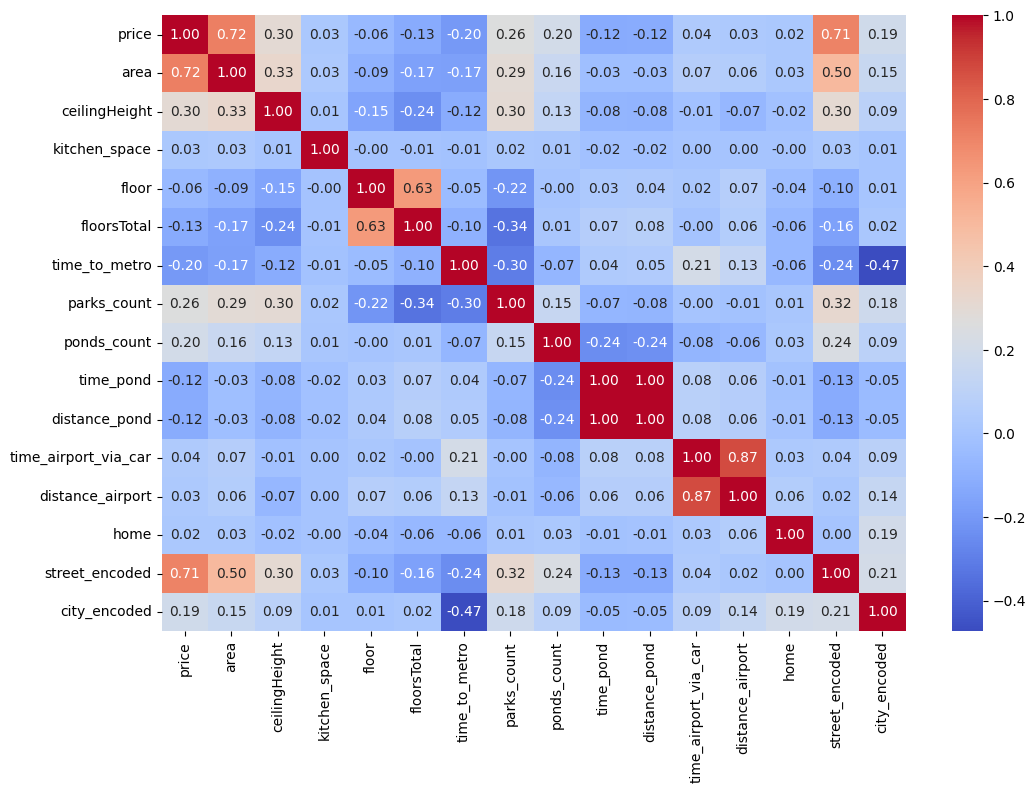

In [74]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [76]:
from sklearn.preprocessing import StandardScaler

numeric_cols = data.select_dtypes(include=['number']).columns
scaler = StandardScaler()
data_scaled = data.copy()
data_scaled[numeric_cols] = scaler.fit_transform(data[numeric_cols])

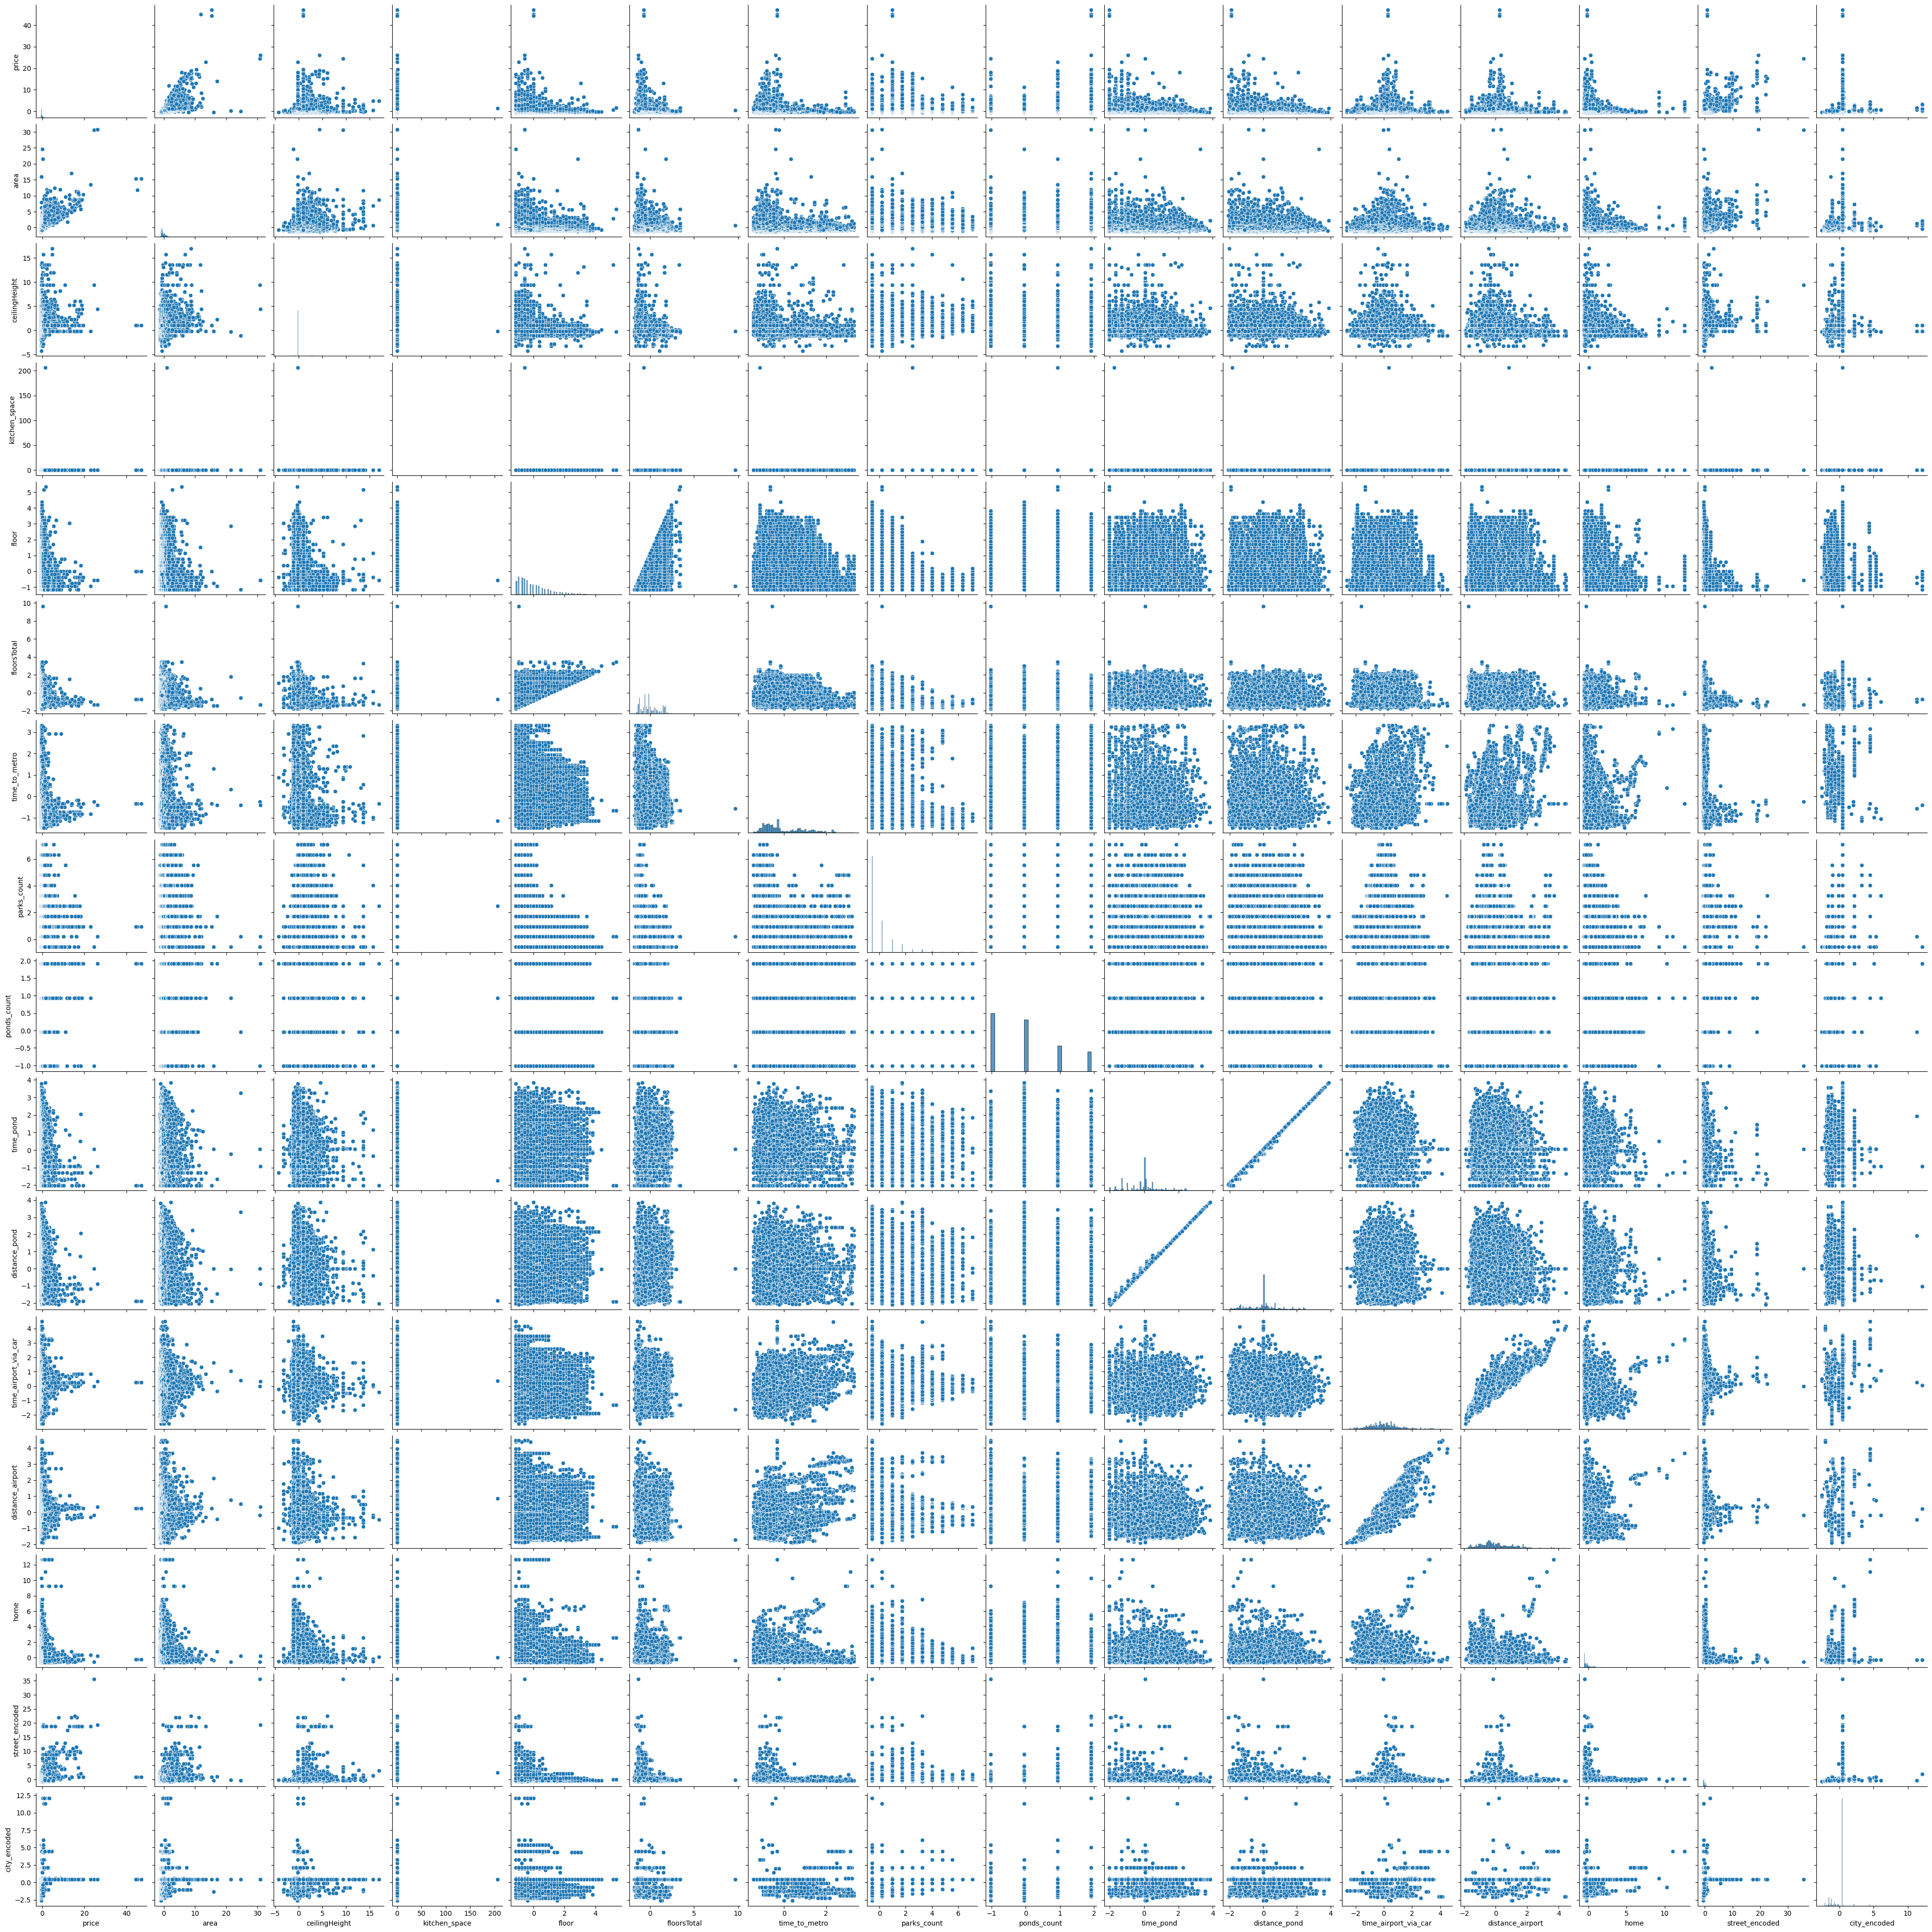

In [77]:
sns.pairplot(data_scaled)

В EDA.md - анализ